## <u>Sales Prediction using Python, Scikit-learn

#### <i> Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

#### <i> Loading Dataset provided by AFAME TECHNOLOGIES

In [4]:
df = pd.read_csv("Sales.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### <i> Getting data description

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<li> We have 200 rows of data.</li>
<li> No NULL row found.</li>
<li> Data Feature (advertising expense): TV, Radio, Newspaper.</li>
<li> Target Feature: Sales</li>
<li> As currency is not mentioned by the data provider, I'll state these figure are normalized.</li>
<hr>

## <i>Pre-processing data </i>
<li> <b>Increasing data counts</b> by adding random noise. </li>
<li> Maintaing correltion between the Features after adding noise.</li>
<li> Checking metrics for interpreting relationship.</li>

In [8]:
print(df.shape)
# Function to add noise to the existing data
def augment_data(df, noise_std=0.1, num_samples=5):
    augmented_data = []
    for _, row in df.iterrows():
        for _ in range(num_samples):
            noise = np.random.normal(scale=noise_std, size=len(row) - 1)  # Exclude 'Sales' column
            new_row = row.copy()
            new_row[['TV', 'Radio', 'Newspaper']] += noise
            augmented_data.append(new_row)
    return pd.DataFrame(augmented_data)

# Augment the data with noise
augmented_df = augment_data(df, noise_std=5, num_samples=20)

augmented_df.shape

(200, 4)


(4000, 4)

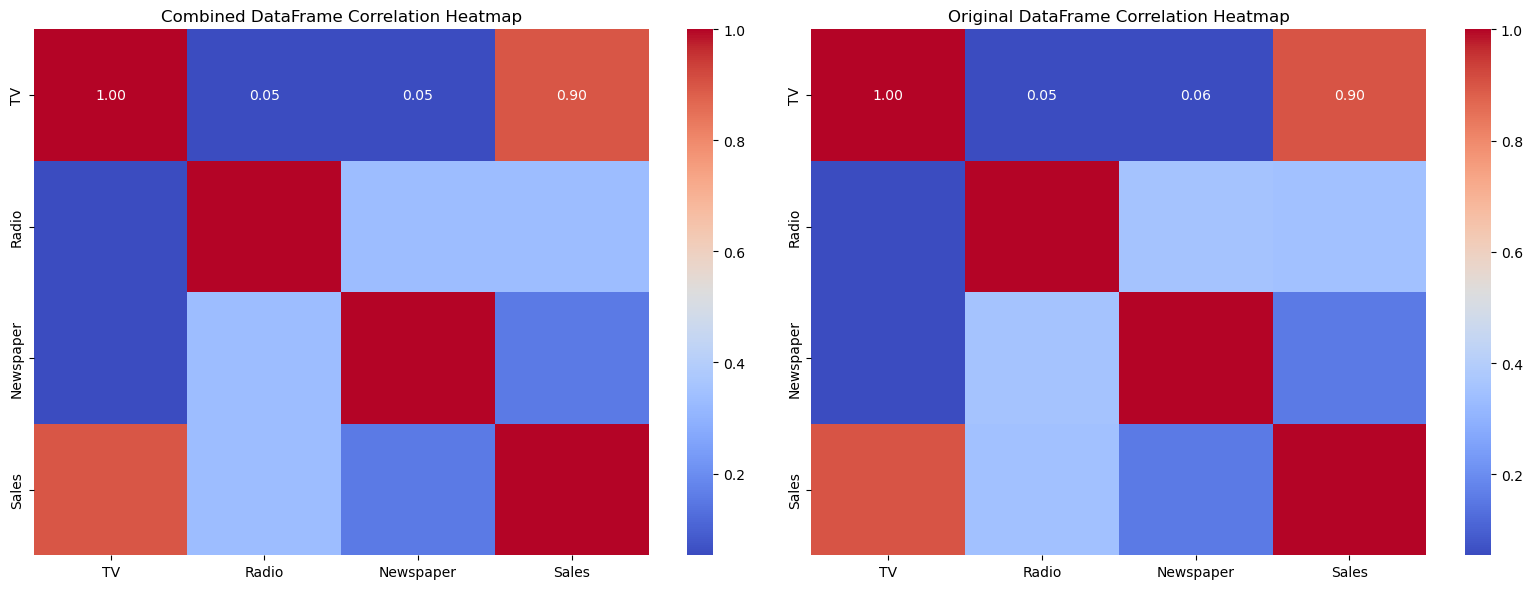

In [9]:
combined_df = pd.concat([df, augmented_df], ignore_index=True)

correlation_matrix1 = combined_df.corr()
correlation_matrix2 = df.corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[1])
axes[1].set_title('Original DataFrame Correlation Heatmap')

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[0])
axes[0].set_title('Combined DataFrame Correlation Heatmap')

plt.tight_layout()

plt.show()


In [10]:
pearson_correlation1 = correlation_matrix2['Sales'].drop('Sales')# Remove correlation with target variable itself

pearson_correlation2 = correlation_matrix1['Sales'].drop('Sales')# Remove correlation with target variable itself 

print("Pearson Correlation Coefficients for Original Datarame:")
print(pearson_correlation1)

print("Pearson Correlation Coefficients for Augmented Datarame:")
print(pearson_correlation2)

Pearson Correlation Coefficients for Original Datarame:
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64
Pearson Correlation Coefficients for Augmented Datarame:
TV           0.899618
Radio        0.331533
Newspaper    0.154589
Name: Sales, dtype: float64


The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. In the context provided:

**For the Original DataFrame:**

- The Pearson correlation coefficient between TV advertising expenditures and sales is approximately **0.9012**, indicating a **strong positive** linear relationship between TV advertising expenditures and sales. This suggests that as spending on TV advertising increases, sales tend to increase as well.
- The coefficient for Radio advertising expenditures and sales is approximately **0.3496**, indicating a **moderate positive** linear relationship. While not as strong as the relationship with TV advertising, there is still a positive association between Radio advertising expenditures and sales.
- The coefficient for Newspaper advertising expenditures and sales is approximately **0.1580**, indicating a **weak positive** linear relationship. This suggests that the correlation between Newspaper advertising expenditures and sales is relatively weak compared to TV and Radio advertising.

**For the Augmented DataFrame:**

- The Pearson correlation coefficients for TV, Radio, and Newspaper advertising expenditures with sales in the augmented DataFrame are similar to those in the original DataFrame. There are slight changes in the coefficients, but the overall relationships remain consistent.
- The coefficient values for TV, Radio, and Newspaper advertising expenditures with sales remain **positive**, indicating that higher expenditures in these advertising channels tend to be associated with higher sales.

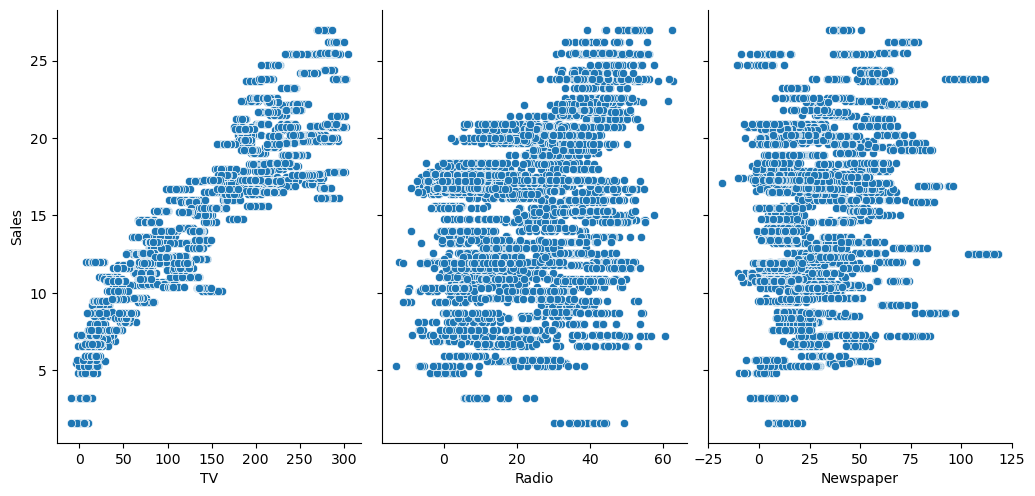

In [28]:
sns.pairplot(combined_df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter', aspect = 0.7, height =5)
plt.show()

## Model Training, prediction and evaluation

#### Evaluation Metrics:

<li><b>Mean Squared Error (MSE)</b>: The average squared difference between the predicted sales values and the actual sales values. A lower MSE indicates better model performance, with zero indicating perfect predictions.
</li>

<li><b>Root Mean Squared Error (RMSE)</b>: The square root of the MSE, representing the average magnitude of error in the predicted sales values. It is in the same units as the target variable (sales), making it easier to interpret. Lower values signify better model accuracy.
</li> 

<li><b>Mean Absolute Error (MAE)</b>: The average absolute difference between the predicted and actual sales values. It provides a measure of the average magnitude of errors in the predictions. Like MSE, lower values indicate better model performance.
</li>

<li><b>R-squared (R²) Score</b>: The proportion of variance in the target variable (sales) that is explained by the independent variables (advertising expenditures). R² ranges from 0 to 1, where 1 indicates a perfect fit. Higher values suggest that the model captures more variance in the target variable. 
</li>


In [29]:
X = combined_df[['TV', 'Radio', 'Newspaper']]
y = combined_df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Linear regression 

In [33]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("R-squared (R²) Score:", r2_lr)

Multiple Linear Regression:
Mean Squared Error (MSE): 3.2492250356871724
Root Mean Squared Error (RMSE): 1.8025606884893424
Mean Absolute Error (MAE): 1.3781006209073094
R-squared (R²) Score: 0.8872880923124138


## 2. Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2 
model_pr = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model_pr.fit(X_train, y_train)

y_pred2 = model_pr.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
rmse = root_mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) Score:", r2)

Multiple Linear Regression:
Mean Squared Error (MSE): 2.125198938936709
Root Mean Squared Error (RMSE): 1.4578062076067275
Mean Absolute Error (MAE): 1.121354027727611
R-squared (R²) Score: 0.9262792745986177


## 3. Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = make_pipeline(GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1))

model_gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)

ms_gbr = mean_squared_error(y_test, y_pred_gbr)
rms_gbr = root_mean_squared_error(y_test, y_pred_gbr)
ma_gbr = mean_absolute_error(y_test, y_pred_gbr)
r_gbr = r2_score(y_test, y_pred_gbr)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", ms_gbr)
print("Root Mean Squared Error (RMSE):", rms_gbr)
print("Mean Absolute Error (MAE):", ma_gbr)
print("R-squared (R²) Score:", r_gbr)

Multiple Linear Regression:
Mean Squared Error (MSE): 1.127090538887912
Root Mean Squared Error (RMSE): 1.061645203864225
Mean Absolute Error (MAE): 0.7982109112960258
R-squared (R²) Score: 0.9609025157139295


## 4. Support Vector Machine

In [36]:
from sklearn.svm import SVR

# Initialize the model
model_svr = SVR(kernel='poly', C=0.5, epsilon= 0.5)

# Fit the model to the training data
model_svr.fit(X_train, y_train)


y_pred_svr = model_svr.predict(X_test)

ms_svr = mean_squared_error(y_test, y_pred_svr)
rms_svr = root_mean_squared_error(y_test, y_pred_svr)
ma_svr = mean_absolute_error(y_test, y_pred_svr)
r_svr = r2_score(y_test, y_pred_gbr)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", ms_svr)
print("Root Mean Squared Error (RMSE):", rms_svr)
print("Mean Absolute Error (MAE):", ma_svr)
print("R-squared (R²) Score:", r_svr)

Multiple Linear Regression:
Mean Squared Error (MSE): 7.535757841193481
Root Mean Squared Error (RMSE): 2.7451334833106897
Mean Absolute Error (MAE): 2.1698972239087673
R-squared (R²) Score: 0.9609025157139295


## 5. Neural Network

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model_nn.compile(optimizer='adam', loss='mse')

model_nn.fit(X_train, y_train, epochs=10, batch_size=1)

y_pred_nn = model_nn.predict(X_test)

ms_nn = mean_squared_error(y_test, y_pred_nn)
rms_nn = root_mean_squared_error(y_test, y_pred_nn)
ma_nn = mean_absolute_error(y_test, y_pred_nn)
r_nn = r2_score(y_test, y_pred_nn)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", ms_nn)
print("Root Mean Squared Error (RMSE):", rms_nn)
print("Mean Absolute Error (MAE):", ma_nn)
print("R-squared (R²) Score:", r_nn)

Epoch 1/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 10.7445
Epoch 2/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 4.7513
Epoch 3/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 3.3418
Epoch 4/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.9812
Epoch 5/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.8307
Epoch 6/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.6335
Epoch 7/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.6074
Epoch 8/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.4455
Epoch 9/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.2268
Epoch 10/10
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.3545
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Multiple Linear Regression:
Mean Squared Error (MSE): 2.322206354704786
Root Mean Squared Error (RMSE): 1.5238787204711488
Mean Absolute Error (MAE): 1.162811468101683
R-squared (R²) Score: 0.9194453122180696
